In [9]:
#1
from numpy import linalg
import numpy
def clgs(A):
  m,n = A.shape
  P = numpy.eye(m)
  Q = numpy.zeros((m,n))
  R = numpy.zeros((n,n))
  for j in range(0,n):
    aa = numpy.inner(P,A[:,j])
    q = aa/numpy.linalg.norm(aa)
    R[j,j] = numpy.linalg.norm(aa)
    for i in range(j+1, n):
      R[j,i] = numpy.inner(q,A[:,i])
    Q[:,j] = q
    P = P - numpy.outer(q,q)
  return Q,R

def mgs(A):
  m,n = A.shape
  P = numpy.eye(m)
  Q = numpy.zeros((m,n))
  R = numpy.zeros((n,n))
  for j in range(0,n):
    aa = numpy.inner(P,A[:,j])
    q = aa/numpy.linalg.norm(aa)
    R[j,j] = numpy.linalg.norm(aa)
    for i in range(j+1, n):
      R[j,i] = numpy.inner(q,A[:,i])
    Q[:,j] = q
    P = numpy.dot(P, (numpy.eye(m)-numpy.outer(q,q)))
  return Q,R



In [109]:
def qrhouse(A):
  m,n = A.shape
  R = A
  V = numpy.zeros((m,n))
  I = numpy.eye(m)
  for k in range(0,min(m-1,n)):
    x = R[k:m,k]
    v = x+ numpy.sign(x[0])*numpy.linalg.norm(x)*I[k:m,k]
    V[k:m,k] = v
    R[k:m,k:n] = R[k:m,k:n] - 2 * numpy.dot(numpy.outer(v,v), R[k:m,k:n])/ numpy.inner(v,v)
  R = numpy.triu(R[0:n,0:n])
  return V, R

def formQ(V):
  m,n = V.shape
  Q = numpy.eye(m)
  for j in range(min(m-2,n-1),-1,-1):
    v = V[:,j]
    Q = Q - (2/numpy.inner(v,v)) * numpy.dot(numpy.outer(v,v), Q)
  return Q



[-0.9999241509105508, -1.6634727020324174, -1.5423455922144869, -2.082640781586878, -2.3720747029876468, -2.4428908512244614, -2.829875643666448, -2.8344616227618884, -2.931731192699507, -3.6061060458336756, -3.616139240870484, -3.772475266226432, -4.902518192023217, -4.322406539770574, -5.062773011991454, -4.7347752330583575, -5.50342281766631, -5.716253156447152, -5.626698828042473, -6.358036637945933, -6.845292395290267, -6.767204684591334, -7.370816920032802, -7.58522251683496, -7.746340873925076, -9.004723495599595, -7.9514998857127095, -7.279837503438755, -7.673105770614655, -7.188221112465429, -7.100992276283355, -6.708886403901906, -6.44254377590861, -6.496015886504487, -7.637472971734919, -6.482078107640715, -7.94288542779311, -6.4962779689697285, -7.276453927826422, -6.614188126342825, -6.416381231536913, -6.389125060465654, -6.5561620492591866, -6.624542210029906, -6.295792339314085, -6.814464161101518, -6.625661385331087, -6.985571551015311, -6.593387338928091, -6.643461253

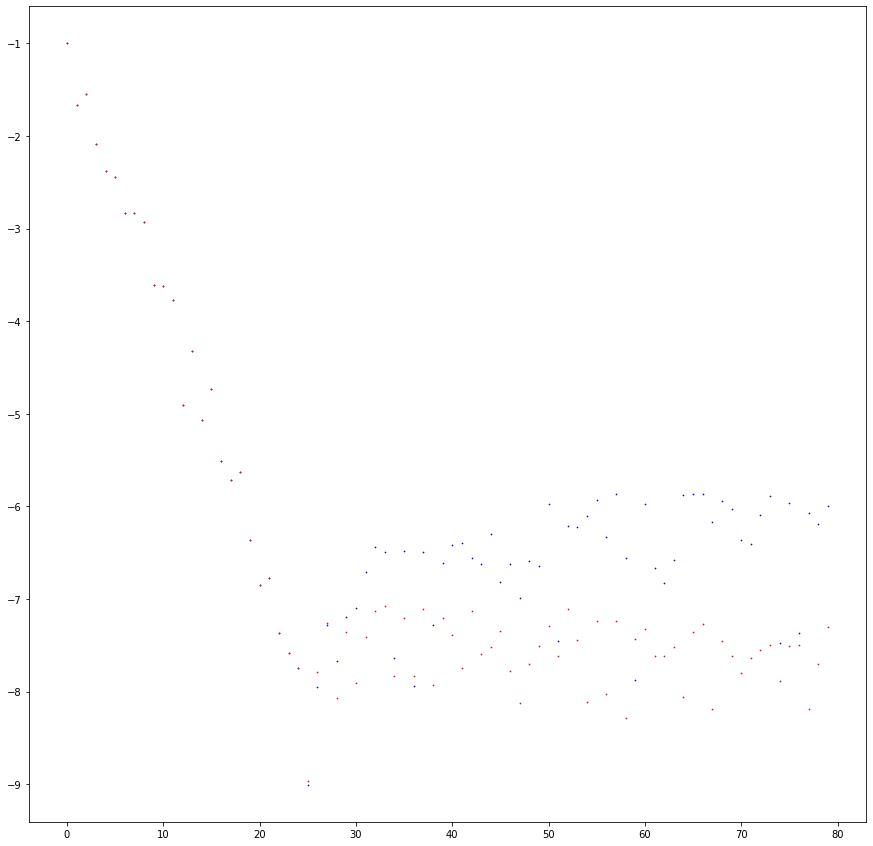

In [19]:
import matplotlib.pyplot as plt
import math

U, X = numpy.linalg.qr(numpy.random.randn(80,80),'complete')
V, X = numpy.linalg.qr(numpy.random.randn(80,80),'complete')
S = numpy.zeros((80,80))
for i in range(0,80):
  S[i,i] = 2**(-i-1)

A = numpy.dot(numpy.dot(U,S),V)

Qc, Rc = clgs(A)
Qm, Rm =mgs(A)

rrc = [math.log10(Rc[i,i]) for i in range(0,80)]
rrm = [math.log10(Rm[i,i]) for i in range(0,80)]
xs = [i for i in range(0,80)]


plt.figure(figsize=(15,15))
plt.scatter(xs, rrc, s= 0.5, c = 'b')
plt.scatter(xs, rrm, s = 0.5, c= 'r')
plt.show() 


In [65]:
B = numpy.array([[0.70000, 0.70711],[0.70001,0.70711]])
Qm, Rm = mgs(B)
V, R = qrhouse(B)
Q =formQ(V)
print(numpy.linalg.norm(numpy.inner(Qm,Qm)- numpy.eye(2)))
print(numpy.linalg.norm(numpy.inner(Q,Q)- numpy.eye(2)))



1.4611280421253326e-12
3.451616545114987e-16


In [96]:
#2
def GivensQR(A):
  m,n = A.shape
  R= A
  Q = numpy.eye(m)
  
  def givens(a,b):
    theta = math.atan(R[a,b]/R[0,b])
    G = numpy.eye(m)
    G[a,a] = math.cos(theta)
    G[b,b] = math.cos(theta)
    G[a,b] = -math.sin(theta)
    G[b,a] = math.sin(theta)
    return G

  for j in range(0,n):
    for i in range(m-1,j,-1):
      G = givens(i,j)
      R = numpy.dot(G,R)
      Q = numpy.dot(G,Q)
      

  return Q.T, R


In [171]:
# test
A = numpy.random.randn(10,5)
a,b = GivensQR(A)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


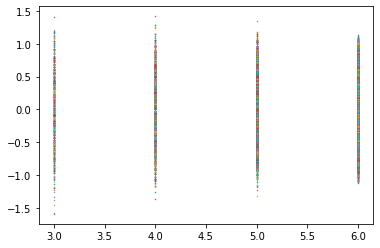

In [176]:
#3
import matplotlib.pyplot as plt

def matrixGen(m, n):
  eigvals = []
  for i in range(0,n):
    A = numpy.random.randn(m,m)/m**(0.5)
    eigvals.append(numpy.linalg.eigvals(A))
  return eigvals

for i in range(3,7):
  for j in range(0,100):
    plt.scatter([i for k in range(0,len(matrixGen(2**i,100)[j]))],matrixGen(2**i,100)[j], s =0.2)
plt.show()
# eigen value가 점점 촘촘히 분포한다


def spectral_test(n) : 
    spectral=[]
    for m in range(1,n) :
        A = numpy.random.randn(m,m)/(m**0.5)
        eigvals = numpy.linalg.eigvals(A)
        spectral.append(max(eigvals.min(), eigvals.max(), key=abs))
    x = [k for k in range(1,n)]
    plt.plot(x, spectral)
    plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


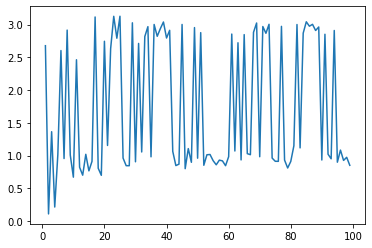

In [182]:
def norm_spectral_test(n) : 
    y_list = []
    for m in range(1,n):
        A = numpy.random.randn(m,m)/(m**0.5)
        eigvals = numpy.linalg.eigvals(A)
        norm2 = numpy.linalg.norm(A,ord=2)
        spectral = max(eigvals.min(), eigvals.max(), key=abs)
        y_list.append(norm2-spectral)
    x = [k for k in range(1,n)]
    plt.plot(x, y_list)
    plt.show()

norm_spectral_test(100)

In [ ]:
# c,d는 시간이 부족해서 해결하지 못했습니다. 죄송합니다,

In [168]:
#4
m = 50
n=12
t = numpy.linspace(0,1.0, num = 50)
A = numpy.vander(t, n, increasing = True)
b = numpy.array([math.cos(4*i) for i in t])

c1= numpy.linalg.solve(numpy.dot(A.T,A), numpy.dot(A.T,b))
Qm, Rm = mgs(A)
Qmtb = numpy.dot(Qm.T,b)
c2 = numpy.linalg.solve(Rm, Qmtb)
Vh, Rh = qrhouse(A)
def Qtb(V,b):
  c =b
  m,n = V.shape
  for j in range(0, min(m-1,n)):
    v = V[j:m,j]
    b[j:m] = b[j:m] - (2/numpy.inner(v,v)) * numpy.dot(numpy.outer(v,v),b[j:m])  
  return c
c3 = numpy.linalg.solve(Rh, Qtb(Vh,b)[0:12])

Q,R = numpy.linalg.qr(A)
Qtb = numpy.dot(Q.T,b)
c4 =numpy.linalg.solve(R,Qtb)
c5 = numpy.linalg.lstsq(A,b,rcond=None)[0]

def svdsolve(a,b):
    u,s,v = numpy.linalg.svd(a)
    c = numpy.dot(u.T,b)
    w = numpy.linalg.solve(numpy.diag(s),c[0:12])
    x = numpy.dot(v.T,w)
    return x

c6 = svdsolve(A,b)

c1,c2,c3,c4,c5,c6
# normal equations exihibit instability(c1)





(array([ 9.99999974e-01,  7.66498915e-06, -8.00028690e+00,  4.20521740e-03,
         1.06346760e+01,  1.43464707e-01, -6.09406371e+00,  7.44895644e-01,
         7.22842359e-01,  7.21671525e-01, -6.73087269e-01,  1.42031154e-01]),
 array([ 1.00000028e+00, -7.99245474e-05, -7.99706113e+00, -4.24255737e-02,
         1.09849836e+01, -1.40838987e+00, -1.77279741e+00, -7.03191940e+00,
         9.75821920e+00, -5.82263237e+00,  2.01421412e+00, -3.35755146e-01]),
 array([ 1.00000000e+00, -4.22743335e-07, -7.99998124e+00, -3.18763328e-04,
         1.06694308e+01, -1.38202905e-02, -5.64707562e+00, -7.53160354e-02,
         1.69360698e+00,  6.03210015e-03, -3.74241700e-01,  8.80405755e-02]),
 array([ 1.00000000e+00, -4.22743324e-07, -7.99998124e+00, -3.18763324e-04,
         1.06694308e+01, -1.38202904e-02, -5.64707562e+00, -7.53160348e-02,
         1.69360698e+00,  6.03210059e-03, -3.74241700e-01,  8.80405755e-02]),
 array([ 1.00000000e+00, -4.22743315e-07, -7.99998124e+00, -3.18763324e-04,
    